In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Reading csv and dropping null data
BabyNames_df = pd.read_csv('BABY_NAMES_ALL_STATES.txt')
print(len(BabyNames_df))
BabyNames_df.dropna(inplace=True)
print(len(BabyNames_df))
BabyNames_df.head()

6028201
6028151


,STATE,GENDER,YEAR,NAME,COUNT
0,AK,F,1910.0,Mary,14.0
1,AK,F,1910.0,Annie,12.0
2,AK,F,1910.0,Anna,10.0
3,AK,F,1910.0,Margaret,8.0
4,AK,F,1910.0,Helen,7.0


In [3]:
# Extract the first initial and format year, count
BabyNames_df['NAMEINIT'] = BabyNames_df['NAME'].str[:1]
BabyNames_df['YEAR'] = BabyNames_df['YEAR'].astype(int)
BabyNames_df['COUNT'] = BabyNames_df['COUNT'].astype(int)
BabyNames_df.head()

,STATE,GENDER,YEAR,NAME,COUNT,NAMEINIT
0,AK,F,1910,Mary,14,M
1,AK,F,1910,Annie,12,A
2,AK,F,1910,Anna,10,A
3,AK,F,1910,Margaret,8,M
4,AK,F,1910,Helen,7,H


In [34]:
# Create regions for the states and add REGION as a column in the df
def getregion(state_code):
    mw = set(["IL", "IN", "MN", "MO", "MI", "OH", "ND", "SD", "NE", "KS", "WI", "IA"])
    nw = set(["WA", "OR", "CA", "NV", "UT", "ID", "CO", "WY", "MT", "AK", "HI"])
    ne = set(["PA", "NY", "ME", "RI", "CT", "DE", "NH", "MD", "VT", "NJ", "MA", "DC"])
    se = set(["WV", "NC", "SC", "AL", "MS", "AR", "GA", "FL", "VA", "KY", "TN", "LA"])
    sw = set(["AZ", "NM", "OK", "TX"])
    
    if state_code in mw:
        return "MW"
    if state_code in nw:
        return "NW"
    if state_code in ne:
        return "NE"
    if state_code in se:
        return "SE"
    if state_code in sw:
        return "SW"

# Run thru the data frame and apply the found region to a new column    
len(BabyNames_df.iloc[:,0].apply(getregion))
BabyNames_df['REGION'] = BabyNames_df['STATE'].apply(getregion)

# BabyNames_df

In [24]:
# Filter = REGION >>> MODIFY REGION HERE <<<
BabyNames_filterRegion = BabyNames_df.loc[BabyNames_df["REGION"] == "SE", :]
# BabyNames_filterRegion

In [11]:
# Top (x) Names by REGION
Count_ByRegion = BabyNames_filterRegion.groupby(['REGION', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByRegion = Count_ByRegion[["COUNT"]]
Count_ByRegion.head(5)

COUNT
REGION NAME            
SE     James    1657253
       William  1150737
       Mary     1116674
       John     1090671
       Robert   1002143

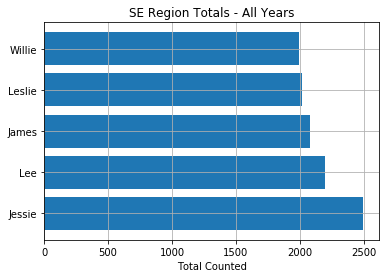

In [7]:
# Plot and save .png

height = [2495, 2194, 2076, 2015, 1994]
bars = ('Jessie', 'Lee', 'James', 'Leslie', 'Willie')
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.xlabel('Total Counted')
plt.title('SE Region Totals - All Years')
plt.grid(True)

plt.savefig("plots/SE_Region_Totals.png")
plt.show()

In [8]:
# Filter = STATE >>> MODIFY STATE HERE <<<
BabyNames_filterState = BabyNames_df.loc[BabyNames_df["STATE"] == "NV", :]
# BabyNames_filterState.head()

In [10]:
# Top (x) Names by STATE
Count_ByState = BabyNames_filterState.groupby(['STATE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByState = Count_ByState[["COUNT"]]
Count_ByState.head(5)

COUNT
STATE NAME              
NV    Michael      14080
      David        10131
      Robert        9451
      Christopher   9153
      James         9103

In [28]:
# Filter = NAMEINIT >> MODIFY NAMEINIT HERE <<<
BabyNames_filterNameInit = BabyNames_df.loc[BabyNames_df["NAMEINIT"] == "C", :]
# BabyNames_filterNameInit

In [32]:
# Filter = STATE >>> MODIFY STATE HERE <<<
BabyNames_filterNameInit = BabyNames_df.loc[BabyNames_df["NAMEINIT"] == "J", :]
# BabyNames_filterInit.head()

In [33]:
# Top (x) Names by NAMEINIT
Count_ByNameInit = BabyNames_filterState.groupby(['NAMEINIT', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByNameInit = Count_ByNameInit[["COUNT"]]
Count_ByNameInit.head(5)

COUNT
NAMEINIT NAME             
J        James     5015584
         John      4885284
         Joseph    2528437
         Jennifer  1469039
         Joshua    1209642

In [15]:
# Top (x) by NAMEINIT
Count_ByNameInit = BabyNames_filterNameInit.groupby(['NAMEINIT']).sum().sort_values(by="COUNT", ascending = False)
Count_ByNameInit = Count_ByNameInit[["COUNT"]]
Count_ByNameInit.head(5)

,COUNT
NAMEINIT,
C,22912372


In [17]:
# Create bins in which to place years (WE MAY WANT TO MOVE THIS UP TO BOX 4)
bins = [1909, 1919, 1929, 1939, 1949, 1959,
       1969, 1979, 1989, 1999, 2009, 2019]
# Create labels for these bins
group_labels = ["1910s", "1920s", "1930s", "1940s", "1950s", "1960s",
               "1970s", "1980s", "1990s", "2000s", "2010s"]

BabyNames_df["DECADE"] = pd.cut(BabyNames_df["YEAR"], bins, labels=group_labels)
BabyNames_df.head()

,STATE,GENDER,YEAR,NAME,COUNT,NAMEINIT,REGION,DECADE
0,AK,F,1910,Mary,14,M,NW,1910s
1,AK,F,1910,Annie,12,A,NW,1910s
2,AK,F,1910,Anna,10,A,NW,1910s
3,AK,F,1910,Margaret,8,M,NW,1910s
4,AK,F,1910,Helen,7,H,NW,1910s


In [37]:
# Filter = DECADE >>> 1910s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1910s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1910s  Mary     479564.0
       John     377596.0
       William  303673.0
       James    275979.0
       Helen    248315.0

In [39]:
# Filter = DECADE >>> 1920s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1920s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1920s  Mary     703805.0
       Robert   579203.0
       John     567279.0
       James    518204.0
       William  514581.0

In [40]:
# Filter = DECADE >>> 1930s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1930s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1930s  Robert   592996.0
       Mary     575601.0
       James    549966.0
       John     490023.0
       William  418101.0

In [41]:
# Filter = DECADE >>> 1940s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1940s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1940s  James    797845.0
       Robert   759631.0
       John     713107.0
       Mary     641864.0
       William  557441.0

In [42]:
# Filter = DECADE >>> 1950s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1950s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1950s  James    845696.0
       Michael  838899.0
       Robert   831879.0
       John     799218.0
       David    770707.0

In [43]:
# Filter = DECADE >>> 1960s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1960s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1960s  Michael  836401.0
       David    736000.0
       John     715756.0
       James    687461.0
       Robert   652996.0

In [44]:
# Filter = DECADE >>> 1970s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1970s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME                 
1970s  Michael      712353.0
       Jennifer     583104.0
       Christopher  477902.0
       Jason        464834.0
       David        447858.0

In [45]:
# Filter = DECADE >>> 1980s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1980s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME                 
1980s  Michael      668510.0
       Christopher  558078.0
       Jessica      470937.0
       Matthew      461007.0
       Jennifer     441993.0

In [46]:
# Filter = DECADE >>> 1990s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1990s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME                 
1990s  Michael      463647.0
       Christopher  360819.0
       Matthew      351959.0
       Joshua       329616.0
       Jessica      303533.0

In [47]:
# Filter = DECADE >>> 2000s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "2000s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
2000s  Jacob    274028.0
       Michael  250905.0
       Joshua   232089.0
       Emily    223824.0
       Matthew  221648.0

In [48]:
# Filter = DECADE >>> 2010s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "2010s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME              
2010s  Emma      177420.0
       Sophia    166996.0
       Olivia    165587.0
       Noah      164229.0
       Isabella  156722.0